## Radom Forest u Bosques aleatorios

Algortimos de tipo ensamble es decir --> (Combinan muchos arboles de desicion)

Ensamble --> Metodo combinado, para mejorar el rendimiento de nuestro modelo de ML, para aprovecha el random forest.

--> Ensamble es un proceso de contruccion estrategico de varios modelos para resolver algo en particular. 

Son usados en problemas de clasficiacion, son supervisados y ayudana problemas de regresion.


# Mi primer random forest con scikit-learn

In [1]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [6]:
#Cargamos dataset a utilizar
df_diabetes = pd.read_csv("Datasets\pima-indians-diabetes.csv", sep = ",")

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\AlexisBenitez\AppData\Local\Temp\ipykernel_11516\1626665635.py:2: SyntaxWarning: invalid escape sequence '\p'
  df_diabetes = pd.read_csv("Datasets\pima-indians-diabetes.csv", sep = ",")


## Exploración de datos

In [7]:
#Visualizacion del dataframe
df_diabetes.sample(10)

,6,148,72,35,0,33.6,0.627,50,1
617,9,112,82,24,0,28.2,1.282,50,1
558,11,85,74,0,0,30.1,0.300,35,0
577,10,133,68,0,0,27.0,0.245,36,0
622,0,94,70,27,115,43.5,0.347,21,0
523,3,125,58,0,0,31.6,0.151,24,0
470,0,137,70,38,0,33.2,0.170,22,0
674,6,195,70,0,0,30.9,0.328,31,1
465,0,74,52,10,36,27.8,0.269,22,0
556,8,110,76,0,0,27.8,0.237,58,0
157,2,88,74,19,53,29.0,0.229,22,0


In [8]:
#Renombramos las columnas
df_diabetes.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']

In [9]:
#Verificacion de datos
df_diabetes.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [10]:
# Anaizamos el shape del objeto
print(df_diabetes.shape)

(767, 9)


In [11]:
df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

In [ ]:
df_diabetes.isnull().sum() , df_diabetes.isna().sum()


-------Space----------


(1. Number of times pregnant                                                    0
 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
 3. Diastolic blood pressure (mm Hg)                                            0
 4. Triceps skin fold thickness (mm)                                            0
 5. 2-Hour serum insulin (mu U/ml)                                              0
 6. Body mass index (weight in kg/(height in m)^2)                              0
 7. Diabetes pedigree function                                                  0
 8. Age (years)                                                                 0
 9. Class variable (0 or 1)                                                     0
 dtype: int64,
 1. Number of times pregnant                                                    0
 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
 3. Diastolic blood pressure (mm Hg)                                            0
 

## Entrenamiento de random forest con scikit-learn

In [19]:
#Separamos en X e y
X = df_diabetes.drop("9. Class variable (0 or 1)", axis =1)
y = df_diabetes["9. Class variable (0 or 1)"]

In [20]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=00000)

In [21]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
random_forest = RandomForestClassifier(n_estimators=10, random_state=00000)

In [22]:
#Entrenamiento
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [23]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [ ]:
y_train_pred,  y_test_pred

## Evaluación del modelo

In [32]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es:', train_accuracy)
print('El accuracy en test es:', test_accuracy)

El accuracy en train es: 0.9850746268656716
El accuracy en test es: 0.7445887445887446


In [33]:
#Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": random_forest.feature_importances_}).sort_values("importance", ascending = False)

# Mostrar
feature_importances_df

,feature,importance
1,2. Plasma glucose concentration a 2 hours in a...,0.205740
5,6. Body mass index (weight in kg/(height in m)^2),0.193899
7,8. Age (years),0.129633
6,7. Diabetes pedigree function,0.126973
0,1. Number of times pregnant,0.096289
2,3. Diastolic blood pressure (mm Hg),0.086302
3,4. Triceps skin fold thickness (mm),0.081293
4,5. 2-Hour serum insulin (mu U/ml),0.079870


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test'),
  Text(1, 0, '6. Body mass index (weight in kg/(height in m)^2)'),
  Text(2, 0, '8. Age (years)'),
  Text(3, 0, '7. Diabetes pedigree function'),
  Text(4, 0, '1. Number of times pregnant'),
  Text(5, 0, '3. Diastolic blood pressure (mm Hg)'),
  Text(6, 0, '4. Triceps skin fold thickness (mm)'),
  Text(7, 0, '5. 2-Hour serum insulin (mu U/ml)')])

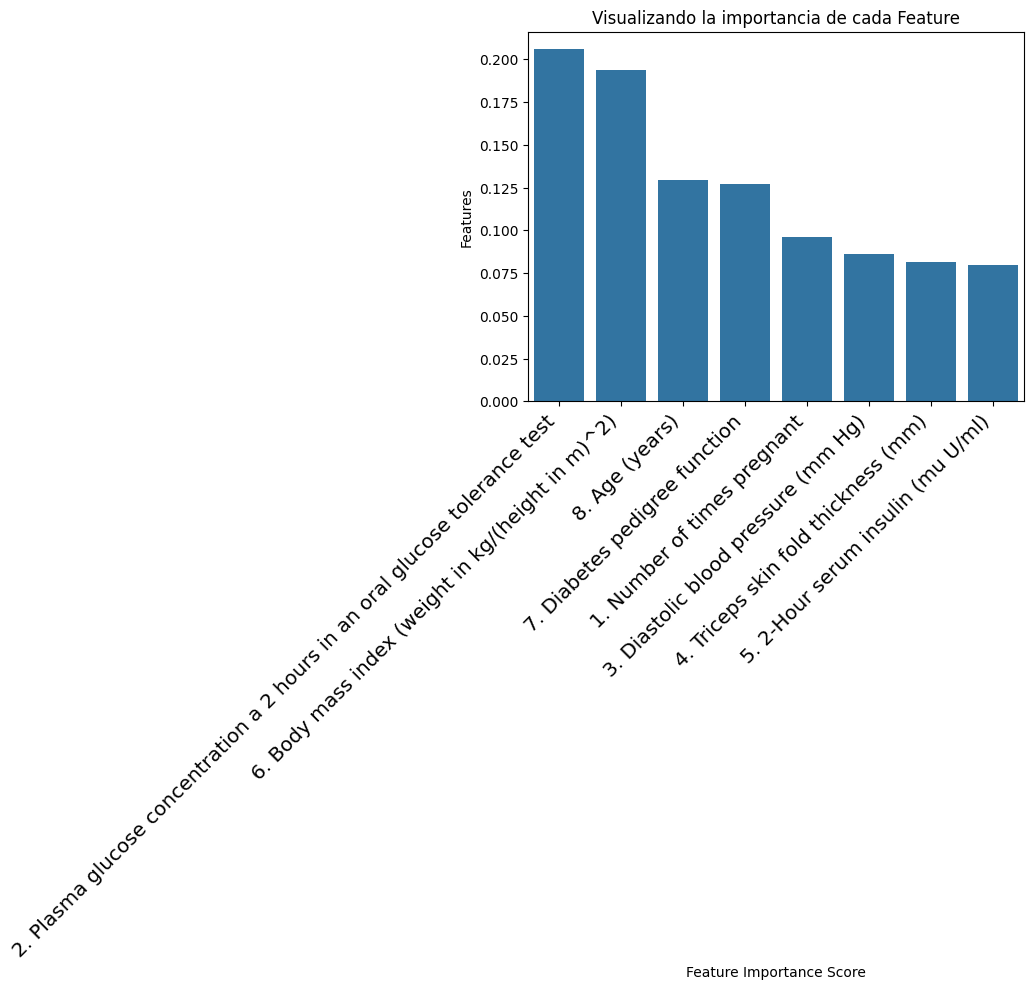

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizando la importancia de cada Feature")
plt.xticks(rotation=45, horizontalalignment = "right", fontweight="light", fontsize="x-large")

### **Extra para recordar**

Debemos evitar el overfitting que sucede cuando nuestro modelo tiene mucha profundidad, asi que para solucionar, debemos crear muchos arboles y tener algo como una votacion de la que se obtenga y asi tenemos nuestro valor final.

--> Evaluar la cantiadd de cantidad de arobles a configurar pues en funcion de estos nuestro procesamiento es mayor u menor 


### **¿Cuándo utilizar random forest?**
- Funciona muy bien sin ajustar hiperparametros
- Al Utilizar mutiples alboles podemos disminuir el riesgo de overfittin
- Suele mantenerse estable frente a otras muestras de datos

*Desventajas*
- Mucho mas costoso crear ejecutar random forest que si solo crearamos un arbolito 
- No funciona bien con dataset pequeños
- Puede requerir mucho tiempo de entrenamiento
- Su intepretacion se puede volver compleja

**Asi que usamos un radom forest:**
    - Rapido y faicl de aplicar
    - Tiene multiples tecnicas para ajsutar hiperparametros
    - Pueden ser para clasficiacion y de regresion
    - Dataset grandes
    - Para evitar el overfittin aplicando metodos de esamble


Link interesante https://cienciadedatos.net/documentos/py08_random_forest_python



## Extra 

**Para pensar: ¿Qué pasa si agregamos más estimadores para nuestro modelo de random forest?**

In [29]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

parametros = {
  'n_estimators' : range(4,10),
  'criterion' : ['mse', 'mae', 'gini', 'entropy', 'log_loss'],
  'max_depth' : range(2,4)
  }

rf_grid = GridSearchCV(rf, parametros, cv = 5, scoring='accuracy').fit(X,y)

c:\Users\AlexisBenitez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\AlexisBenitez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\AlexisBenitez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\AlexisBenitez\AppData\Local\Programs\Python\Python312

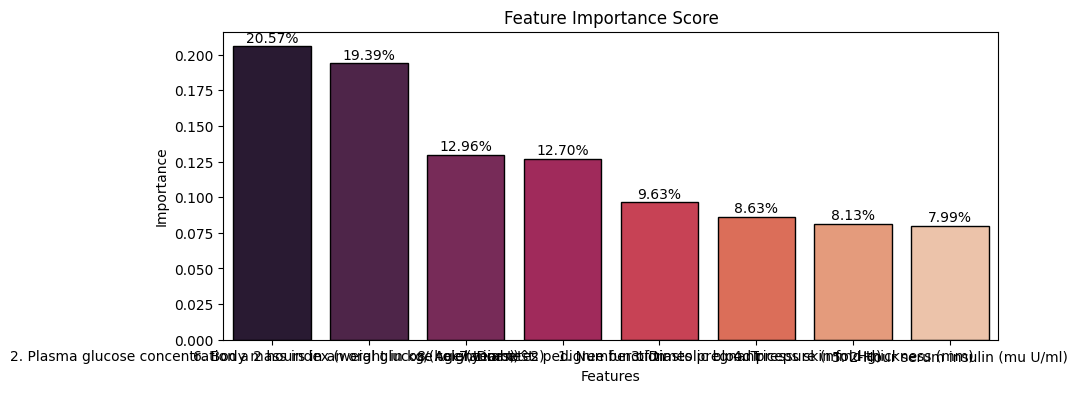

In [35]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 4))
sns.barplot(x=feature_importances_df['feature'], y=feature_importances_df['importance'], palette='rocket', edgecolor='black')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Score')
for i, value in enumerate(feature_importances_df['importance']):
    plt.text(i, value + 0.003, f'{value * 100:.2f}%', ha='center')
plt.show()

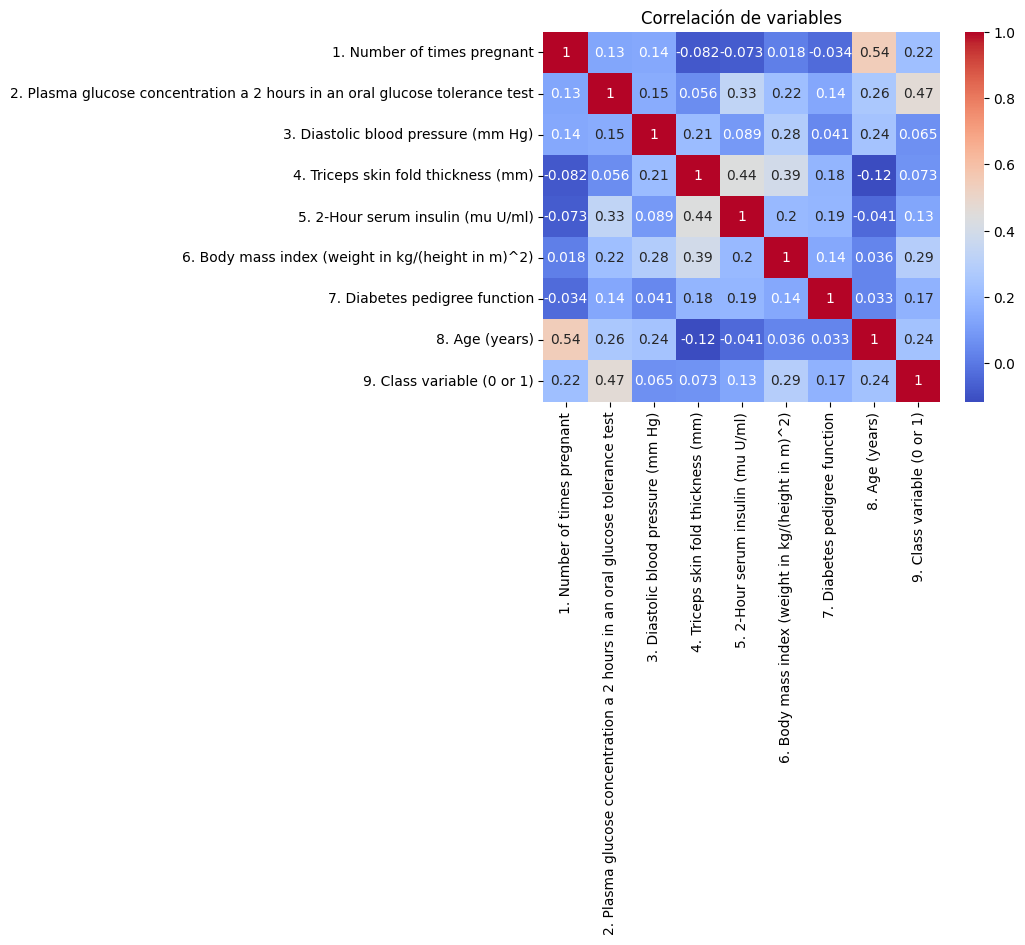

In [42]:

sns.heatmap(df_diabetes.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación de variables')
plt.show()


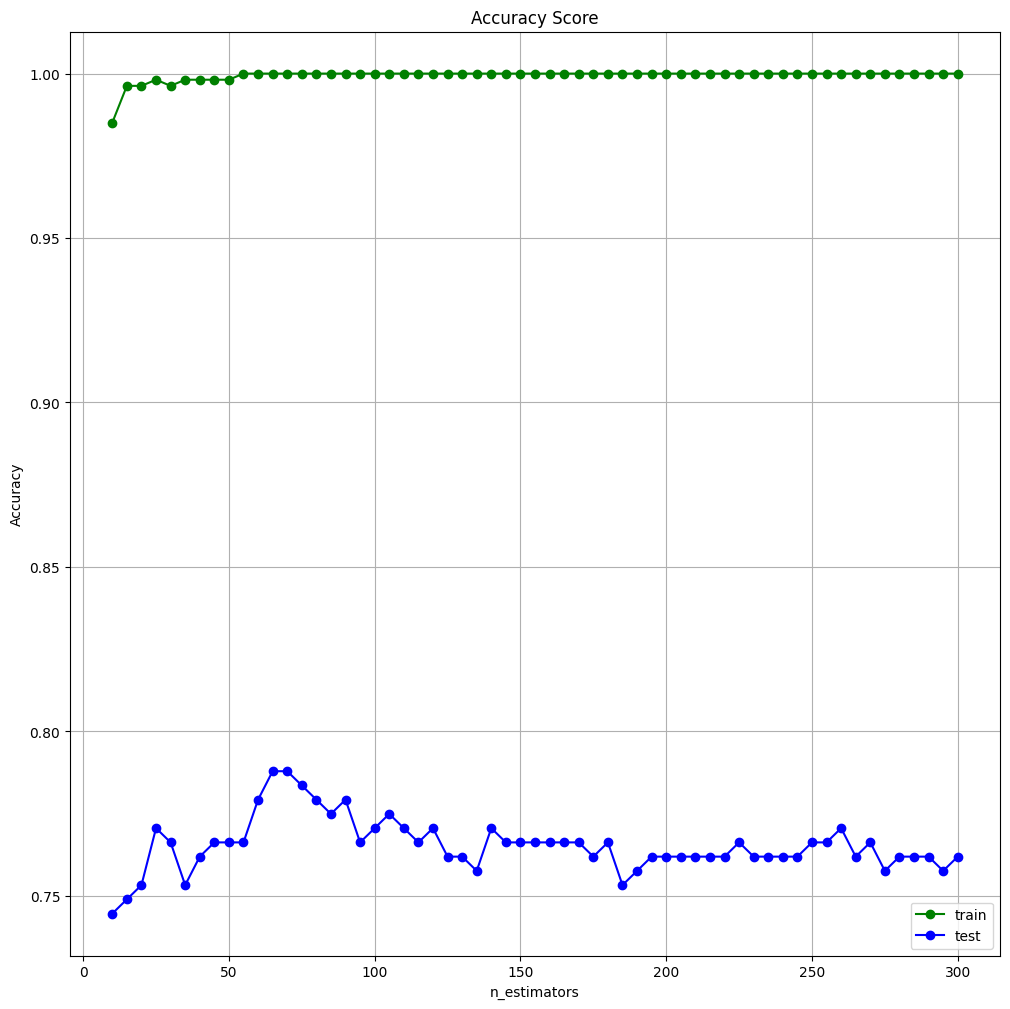

In [43]:
n_estimators = list()
accuracy_score_train = list()
accuracy_score_test = list()

for n in range(10, 301, 5):
  n_estimators.append(n)
  rf = RandomForestClassifier(n_estimators=n, random_state = 00000)
  rf.fit(X_train, y_train)

  y_train_pred = rf.predict(X_train)
  y_test_pred = rf.predict(X_test)

  accuracy_score_train.append(accuracy_score(y_train, y_train_pred))
  accuracy_score_test.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(12, 12))
plt.plot(n_estimators, accuracy_score_train, 'g', marker='o', label='train')
plt.plot(n_estimators, accuracy_score_test, 'b', marker='o', label='test')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy Score')
plt.legend()
plt.grid()
plt.show()